Phân loại hình ảnh với bộ dữ liệu được gán nhãn có sẵn từ: CIFAR-10

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

Tải tập dữ liệu từ CIFAR-

In [4]:
# Tải dữ liệu CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Trực quan dữ liệu

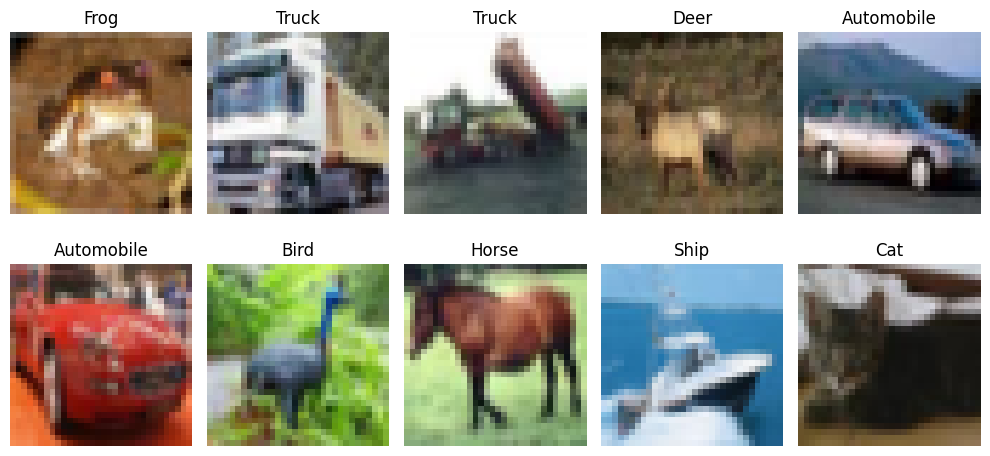

In [5]:
# Đặt tên cho các lớp
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat',
               'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Vẽ một số hình ảnh từ tập train
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

Chuyển đổi các giá trị pixel của tập dữ liệu sang kiểu float và sau đó chuẩn hóa tập dữ liệu

In [6]:
# Chuyển đổi kiểu dữ liệu sang float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuẩn hóa các giá trị pixel vào khoảng [0, 1]
x_train /= 255.0
x_test /= 255.0

print("Kích thước của x_train:", x_train.shape)
print("Kích thước của x_test:", x_test.shape)

Kích thước của x_train: (50000, 32, 32, 3)
Kích thước của x_test: (10000, 32, 32, 3)


Mã hóa một lần (one-hot encoding) cho các lớp mục tiêu

In [7]:
# Mã hóa nhãn thành dạng one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Kích thước của y_train:", y_train.shape)
print("Kích thước của y_test:", y_test.shape)

Kích thước của y_train: (50000, 10)
Kích thước của y_test: (10000, 10)


Xây dựng mô hình CNN


1. Thêm lớp Conv2D thứ hai
2. Thêm lớp MaxPooling để giảm kích thước không gian
3. Chuyển đổi đầu ra thành một vector 1 chiều
4. Thêm lớp Dense với 512 nút và hàm kích hoạt ReLU
5. Thêm lớp Dropout nữa
6. Lớp đầu ra với 10 nút, mỗi nút tương ứng với một lớp (10 lớp cho CIFAR-10)


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Tối ưu hóa mô hình

In [12]:
# Sử dụng SGD với learning rate = 0.01 và momentum = 0.9
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Biên dịch mô hình với loss function 'categorical_crossentropy' và metric 'accuracy'
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

Đào tạo mô hình

In [16]:
# Đào tạo mô hình với 25 epoch và batch_size = 64
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 191s 244ms/step - accuracy: 0.7383 - loss: 0.7402 - val_accuracy: 0.6850 - val_loss: 0.9276
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/step - accuracy: 0.7697 - loss: 0.6446 - val_accuracy: 0.6879 - val_loss: 0.9344
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 243ms/step - accuracy: 0.8017 - loss: 0.5632 - val_accuracy: 0.6954 - val_loss: 0.9214
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/step - accuracy: 0.8227 - loss: 0.4987 - val_accuracy: 0.6961 - val_loss: 0.9515
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 242ms/step - accuracy: 0.8394 - loss: 0.4501 - val_accuracy: 0.6957 - val_loss: 0.9577
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 237ms/step - accuracy: 0.8547 - loss: 0.4130 - val_accuracy: 0.7116 - val_loss: 0.9997
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 243ms/step - accuracy: 0.8717 - loss: 0.3646 - val_accuracy: 0.6969 - val_loss: 1.0385
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 237ms/step - accuracy: 0.8806 -

Vẽ đồ thị quá trình huấn luyện

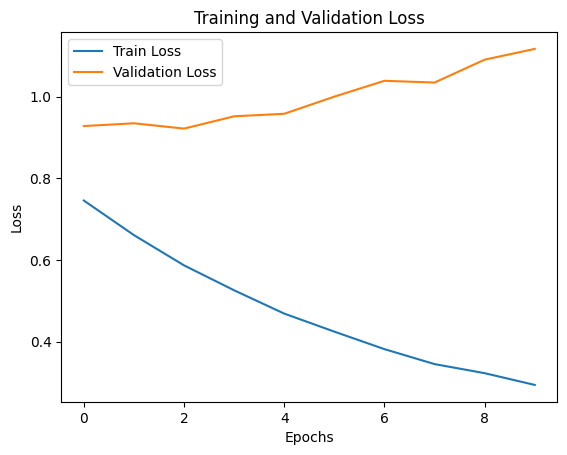

In [23]:
# Vẽ đồ thị mất mát (Loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

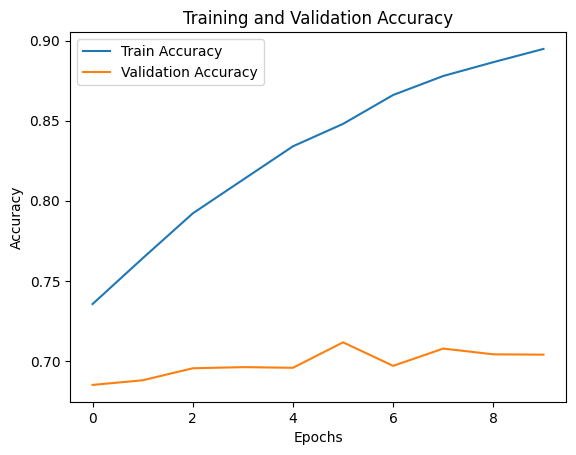

In [24]:
# Vẽ đồ thị độ chính xác (Accuracy)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Đánh giá mô hình trên tập kiểm tra

In [25]:
# Đánh giá mô hình trên tập kiểm tra
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Test Loss: 1.116530418395996
Test Accuracy: 0.7038999795913696


Lưu mô hình

In [26]:
# Lưu mô hình vào một file H5
model.save('/content/drive/MyDrive/Artificial-intelligence/Checkpoint-model-down/cnn_model.h5')

Tạo từ điển ánh xạ lớp để dự đoán

In [31]:
from PIL import Image
import numpy as np

# Từ điển kết quả
results = {
   0: 'airplane',
   1: 'automobile',
   2: 'bird',
   3: 'cat',
   4: 'deer',
   5: 'dog',
   6: 'frog',
   7: 'horse',
   8: 'ship',
   9: 'truck'
}

# Đường dẫn tới ảnh
image_path = "/content/drive/MyDrive/Artificial-intelligence/Image/1.jpg"

# Mở và chuẩn bị ảnh
im = Image.open(image_path)
im = im.resize((32, 32))
# Chuyển ảnh thành mảng numpy
im = np.array(im)

# Đảm bảo ảnh có 3 kênh màu RGB và chuẩn hóa pixel
if im.shape[-1] == 3:
    im = im.astype('float32') / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]
else:
    im = np.expand_dims(im, axis=-1)   # Nếu là ảnh grayscale, thêm chiều màu

# Thêm một chiều để tạo thành batch
im = np.expand_dims(im, axis=0)

# Dự đoán lớp
pred = np.argmax(model.predict(im), axis=-1)[0]

# Hiển thị kết quả dự đoán
print(f'Predicted class: {results[pred]} (Class index: {pred})')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: airplane (Class index: 0)
